In [1]:
import pandas as pd
import numpy as np

In [2]:
ship = pd.read_csv("titanic_train.csv",index_col=(0))
ship.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
ship.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
ship.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [5]:
ship.describe(include="all")
pd.crosstab(index=ship['Sex'],columns='Count')

col_0,Count
Sex,
female,314
male,577


In [6]:
ship_new = pd.get_dummies(ship,columns=['Sex'],drop_first=True)
ship_new.head()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


In [7]:
y= ship_new[['Survived']]     #Storing as a df in x nd y using [[]]
x=ship_new[['Sex_male']]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.75,random_state=10) 

In [9]:
print("x train and test\n",x_train.shape,'\n',x_test.shape,"\ny train and test\n",y_train.shape,'\n',y_test.shape)

x train and test
 (668, 1) 
 (223, 1) 
y train and test
 (668, 1) 
 (223, 1)


In [10]:
#Alternative method 

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
city = ['Zurich','Delhi','Mumbai','New York','Paris']

In [12]:
le.fit(city)

LabelEncoder()

In [13]:
le.classes_

array(['Delhi', 'Mumbai', 'New York', 'Paris', 'Zurich'], dtype='<U8')

In [14]:
le.transform(city)

array([4, 0, 1, 2, 3])

In [15]:
# All the above commands in one function
le.fit_transform(city)

array([4, 0, 1, 2, 3], dtype=int64)

In [16]:
ship.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
ship['Gender']= le.fit_transform(ship['Sex'])
ship.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Gender
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [18]:
# Modelling
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept=True,multi_class='auto',solver='lbfgs')

In [19]:
# Model Fitting
logreg.fit(x_train,y_train);

C:\Users\piyus\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [20]:
logreg.intercept_

array([0.96176511])

In [21]:
logreg.coef_

array([[-2.30261494]])

In [22]:
# Regression eqn
# log(p/1-p) = 0.96 - 2.30 * Sex_Male

In [23]:
#Prediction 
#Probability of Not survived to Survived
logreg.predict_proba(x_test)

array([[0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.27652493, 0.72347507],
       [0.27652493, 0.72347507],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.27652493, 0.72347507],
       [0.27652493, 0.72347507],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.27652493, 0.72347507],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.27652493, 0.72347507],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.79262966, 0.20737034],
       [0.27652493, 0.72347507],
       [0.

In [24]:
pred_class = logreg.predict(x_test)  #Actual Prediction
pred_class

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1], dtype=int64)

In [25]:
y_test

,Survived
PassengerId,
591,0
132,0
629,0
196,1
231,1
...,...
13,0
204,0
85,1


In [26]:
pd.crosstab(y_test['Survived'],pred_class)

col_0,0,1
Survived,,
0,132,15
1,24,52


In [27]:
#Accuracy = (132+52)/(132+15+24+52)
logreg.score(x_test,y_test)

0.8251121076233184

CONFUSION MATRIX
            y_predicted
             0        1
y_actual
    0       132      15          TN        FP
    1        24      52          FN        TP

In [28]:
# Confusion Matrix(Y_actual values,y_predicted value)
from sklearn import metrics
metrics.confusion_matrix(y_test,pred_class)

array([[132,  15],
       [ 24,  52]], dtype=int64)

In [29]:
print(metrics.classification_report(y_test,pred_class))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       147
           1       0.78      0.68      0.73        76

    accuracy                           0.83       223
   macro avg       0.81      0.79      0.80       223
weighted avg       0.82      0.83      0.82       223



In [30]:
# Precision for 1  = TP/(TP+FP) = 52/(52+15) = 0.78
# Recall for 1 = TP/(TP+FN) = 52/(52+24) = 0.68
# F-1 score for 1 = 2 * (Precision * Recall)/(Precision + Recall) = 0.73
# Support -  frequency of occurance in dataset

# KNN

In [31]:
df = pd.read_csv("iris.csv")

In [32]:
df.head()

,sepal length,sepal width,petal length,petal width,iris
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [33]:
pd.crosstab(index=df['iris'],columns='count')

col_0,count
iris,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [34]:
# Alternative
df['iris'].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: iris, dtype: int64

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   iris          150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [36]:
# X and y in proper form
x = df.iloc[:,0:4]
x.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [37]:
y=df['iris']
y.head()

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object

In [38]:
# Distance of pts with each other - scaling the obs i.e making mean=0 and stdev=1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
x_scaled = scaler.fit_transform(x)

In [40]:
x_scaled[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [41]:
x_scaled.mean(axis=0)

array([-4.73695157e-16, -6.63173220e-16,  3.31586610e-16, -2.84217094e-16])

In [42]:
x_scaled.std(axis=0)

array([1., 1., 1., 1.])

In [43]:
#train test split
xiris_train,xiris_test,yiris_train,yiris_test = train_test_split(x_scaled,y,test_size=0.25,random_state=1)

In [44]:
xiris_train.shape

(112, 4)

In [45]:
xiris_test.shape

(38, 4)

In [46]:
#KNN modelling 

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [47]:
knn.fit(xiris_train,yiris_train)

KNeighborsClassifier()

In [48]:
#Prediction
yiris_pred = knn.predict(xiris_test)
yiris_pred[:5]

array(['Iris-setosa', 'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [49]:
# Actual 
yiris_test.head()

14         Iris-setosa
98     Iris-versicolor
75     Iris-versicolor
16         Iris-setosa
131     Iris-virginica
Name: iris, dtype: object

In [50]:
metrics.confusion_matrix(yiris_test,yiris_pred)

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

In [51]:
#Accuracy
metrics.accuracy_score(yiris_test,yiris_pred)

0.9736842105263158

In [52]:
# For different values of k 
err=[]
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xiris_train,yiris_train)
    pred = knn.predict(xiris_test)
    err.append(1-metrics.accuracy_score(yiris_test,pred))
err



[0.0,
 0.0,
 0.0,
 0.0,
 0.02631578947368418,
 0.0,
 0.02631578947368418,
 0.0,
 0.0,
 0.0]

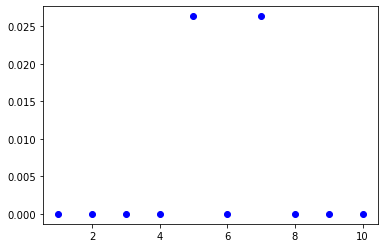

In [53]:
import matplotlib.pyplot as plt 
plt.scatter(range(1,11),err,color='blue')